In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import pi

In [3]:
conn = sqlite3.connect("data.db")
act = pd.read_sql_query("select rowid, * from actors where valid=1;", conn)
n_hits = np.array(act[['tothitsexp0', 'tothitsexp1', 'tothitsexp2']])
keypress = np.array(act[['keydowns0', 'keydowns1', 'keydowns2']])
# act.tail()

In [4]:
def exp_format(x, pos=None):
    names = {1: 'Delay',
            2: 'Delay + predictor',
            3: 'No delay'}
    return names[x]

def game_format(x, pos=None):
    names = {1: 'Delay',
             2: 'Delay\ngamer',
            3: 'Delay\npredictor',
            4: 'Delay\npredictor\ngamer',
            5: 'No delay',
            6: 'No delay\ngamer'}
    return names[x]

def times_format(x, pos=None):
    names = {1: 'Daily',
            2: 'Weekly',
            3: 'Monthly',
            4: 'Yearly',
            5: 'Never'}
    return names[x]

exp_dict = {0:'Delay', 1:'Delay + predictor', 2: 'No delay'}

## Performance

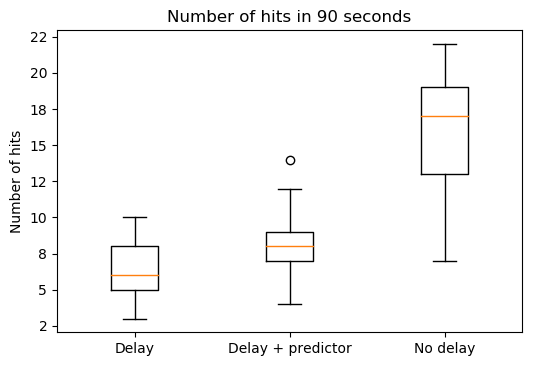

In [5]:
fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Number of hits in 90 seconds')
ax1.boxplot(n_hits)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
ax1.set_yticklabels(['{:.0f}'.format(x) for x in ax1.get_yticks()])
plt.ylabel('Number of hits')
plt.show()

In [6]:
# rel = n_hits.astype(float)
# for row in rel:
#     de = row[2]
#     row[0]=row[0]/de
#     row[1]=row[1]/de
#     row[2]=row[2]/de

# fig, ax = plt.subplots(dpi=100)
# ax.set_title('Relative performance to no delay')
# ax.boxplot(rel)
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
# ax.set_ylim([0,1.1])
# ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
# plt.ylabel('Number of hits')
# plt.show()

In [7]:
# rel = n_hits.astype(float)
# for row in rel:
#     de = row[1]
#     row[0]=row[0]/de
#     row[1]=row[1]/de
#     row[2]=row[2]/de

# fig, ax = plt.subplots(dpi=100)
# ax.set_title('Relative performance to delay + predictor')
# ax.boxplot(rel)
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
# # ax.set_ylim([0,1.1])
# ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
# plt.ylabel('Number of hits')
# plt.show()

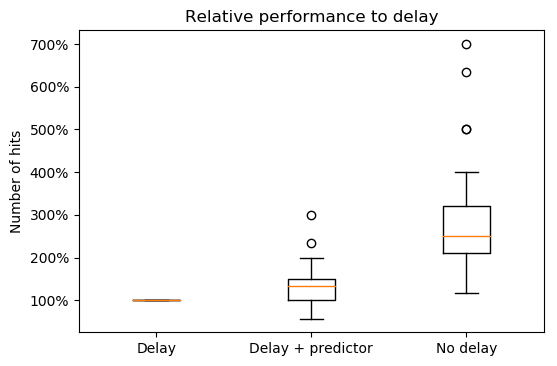

In [8]:
rel = n_hits.astype(float)
for row in rel:
    de = row[0]
    row[0]=row[0]/de
    row[1]=row[1]/de
    row[2]=row[2]/de

fig, ax = plt.subplots(dpi=100)
ax.set_title('Relative performance to delay')
ax.boxplot(rel)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
# ax.set_ylim([0,1.6])
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
plt.ylabel('Number of hits')
plt.show()

## Predictor help

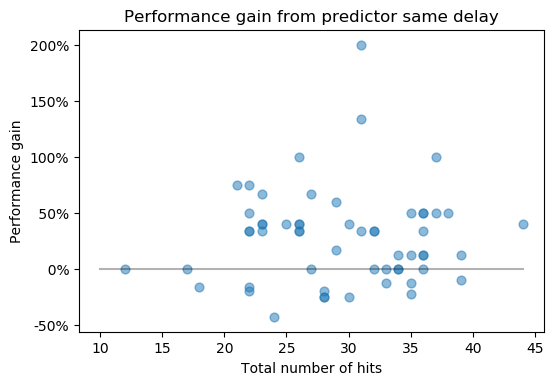

Participants perform on average 28% better with predictor display with the same delay
65% of the participants performed better with the predictor display, while 21% performed worse with the predictor


In [9]:
hits = np.array(act[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])
rel = hits.astype(float)

li = []
gain_li = []
gained = 0
lost = 0
for row in rel:
    gain = row[1]/row[0]
    li.append([gain, row[3]])
    gain_li.append(gain)
    if gain > 1.0:
        gained += 1
    elif gain < 1.0:
        lost += 1
        
gain_per = (gained/len(gain_li))*100
lost_per = (lost/len(gain_li))*100
res = np.array(li)

fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Performance gain from predictor same delay')
ax1.scatter(res[...,1], res[...,0]-1, s=40, alpha=0.5)
plt.ylabel('Performance gain')
ax1.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax1.get_yticks()])
ax1.plot(np.arange(10,45), np.zeros(45-10), 'k', alpha=0.3)
plt.xlabel('Total number of hits')
plt.show()
np.average(gain)
print('Participants perform on average {:.0f}% better with predictor display with the same delay'
      .format((np.average(gain_li)-1)*100))
print('''{:.0f}% of the participants performed better with the predictor display, while {:.0f}% performed worse with the predictor'''.format(gain_per, lost_per))

## Gaming

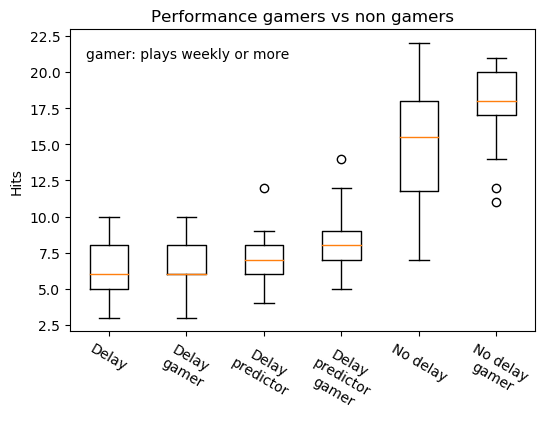

In [10]:
gamers = pd.read_sql_query("select rowid, * from actors where valid=1 and game<=1;", conn)
ga = np.array(gamers[['tothitsexp0', 'tothitsexp1', 'tothitsexp2']])
non_gamers = pd.read_sql_query("select rowid, * from actors where valid=1 and game >1;", conn)
no = np.array(non_gamers[['tothitsexp0', 'tothitsexp1', 'tothitsexp2']])

fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Performance gamers vs non gamers')
ax1.boxplot([no[...,0], ga[...,0], no[...,1], ga[...,1], no[...,2], ga[...,2]])
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(game_format))
plt.ylabel('Hits')
plt.text(0.7, 21, 'gamer: plays weekly or more', fontsize=10)
plt.xticks(rotation=-30)
plt.show()

In [11]:
# g0 = pd.read_sql_query("select rowid, * from actors where valid=1 and game== 0;", conn)
# g0h = np.array(g0[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])
# g1 = pd.read_sql_query("select rowid, * from actors where valid=1 and game== 1;", conn)
# g1h = np.array(g1[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])
# g2 = pd.read_sql_query("select rowid, * from actors where valid=1 and game== 2;", conn)
# g2h = np.array(g2[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])
# g3 = pd.read_sql_query("select rowid, * from actors where valid=1 and game== 3;", conn)
# g3h = np.array(g3[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])
# g4 = pd.read_sql_query("select rowid, * from actors where valid=1 and game== 4;", conn)
# g4h = np.array(g4[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])

# titles = ['delay', 'delay + predictor', 'no delay', 'total hits']
# for i, title  in enumerate(titles):
#     exp = i
#     fig1, ax1 = plt.subplots(dpi=100)
#     ax1.set_title('Performance vs gaming frequency, {}'.format(title))
#     ax1.boxplot([g0h[...,exp], g1h[...,exp], g2h[...,exp], g3h[...,exp], g4h[...,exp]])
#     ax1.xaxis.set_major_formatter(ticker.FuncFormatter(times_format))
#     plt.ylabel('Hits')
#     plt.show()

## Keypresses

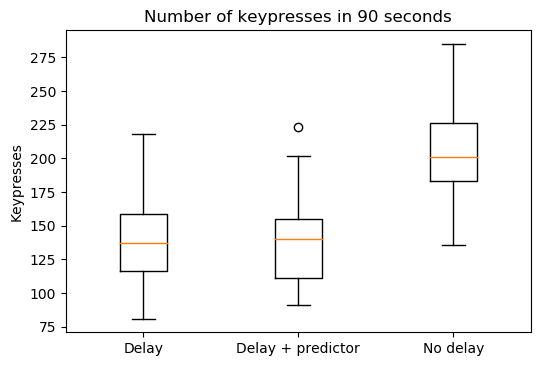

In [12]:
fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Number of keypresses in 90 seconds')
ax1.boxplot(keypress)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
plt.ylabel('Keypresses')
plt.show()

## Hits

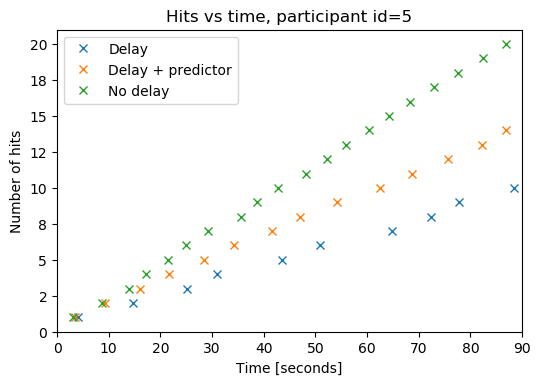

Average hit rates:

Delay             :  4.31 hits/min,   0.0 % improvement
Delay + predictor :  5.18 hits/min,  20.3 % improvement
No delay          : 10.86 hits/min, 152.1 % improvement


In [13]:
act = pd.read_sql_query("select rowid from actors where valid=1;", conn)
actor_ids = act.rowid.values

exp_dict = {0:'Delay', 1:'Delay + predictor', 2: 'No delay'}
rates = [[],[],[]]
selected_act = 5

fig1, ax1 = plt.subplots(dpi=100)
for act in actor_ids:
    for exp in range(3):
        hits_df = pd.read_sql_query("select * from hits where valid=1 and experiment={exp} and actor={act};"
                                 .format(exp=exp, act=act), conn)
        start_df = pd.read_sql_query("select startexp{exp} from actors where rowid={act};".format(exp=exp, act=act), conn)
        start = start_df.values[0][0]
        hits = np.array(hits_df['time'])
        x = hits-start
        y = np.arange(1,len(x)+1)
        
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]
        rates[exp].append(m)
        
        if act == selected_act:
            ax1.plot(x, y, 'x', label=exp_dict[exp])

ax1.set_title('Hits vs time, participant id={}'.format(selected_act))
x = np.arange(0,90)
plt.legend()
plt.ylabel('Number of hits')
plt.xlabel('Time [seconds]')
ax1.set_yticklabels(['{:.0f}'.format(x) for x in ax1.get_yticks()])
ax1.set_ylim([0,21])
ax1.set_xlim([0,90])
plt.show()

np_rates = np.array(rates)
avg_rates = np.average(np_rates, axis=1)*60
print('Average hit rates:\n')
for exp in range(3):
    imp = avg_rates[exp]/avg_rates[0]-1
    print('{:18}: {:>5.2f} hits/min, {:>5.1f} % improvement'.format(exp_dict[exp], avg_rates[exp], imp*100))

## Delay time perception

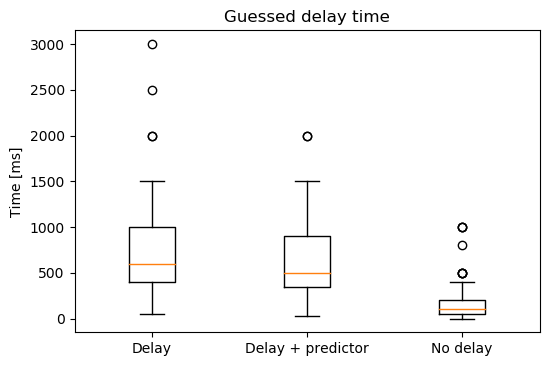

In [14]:
delay_guess = {}
for exp in range(3):
    delay = pd.read_sql_query("select delay from survey where valid=1 and experiment={};".format(exp), conn)
    delay_guess.update({exp:np.array(delay)})
guesses = np.concatenate((delay_guess[0], delay_guess[1], delay_guess[2]), axis=1)

fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Guessed delay time')
ax1.boxplot(guesses)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
plt.ylabel('Time [ms]')
plt.show()

## Demographics

In [15]:
females = pd.read_sql_query("select rowid, * from actors where valid=1 and gender==1;", conn)
males = pd.read_sql_query("select rowid, * from actors where valid=1 and gender==0;", conn)
tot = len(males)+len(females)
# n_hits = np.array(act[['tothitsexp0', 'tothitsexp1', 'tothitsexp2']])
print('{} participants, {:.0f}% females'.format(tot, float(len(females))/float(tot)*100))

57 participants, 33% females


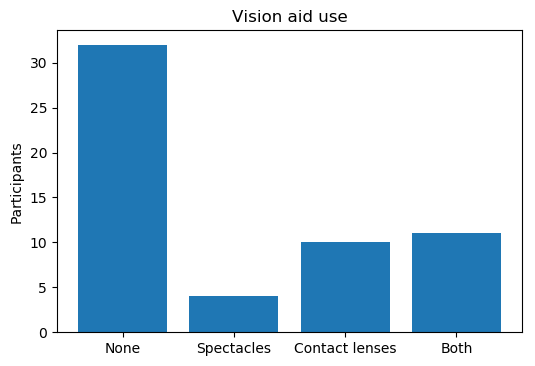

In [16]:
eye_df = pd.read_sql_query("select rowid, * from actors where valid=1;", conn)
eye = np.array(eye_df['eye'])
totals = {0:0,
         1:0,
         2:0,
         3:0}
total = 0
for num in eye:
    totals[num]+= 1
    total += 1
    
fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Vision aid use')
ax1.bar(np.arange(len(totals)),[totals[i] for i in range(len(totals))])
# ax1.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
ax1.set_xticks(np.arange(len(totals)))
ax1.set_xticklabels(('None', 'Spectacles', 'Contact lenses', 'Both'))
plt.ylabel('Participants')
plt.show()

## Load index
total is {{total}}

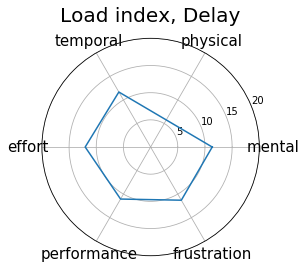

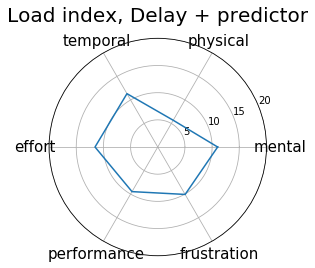

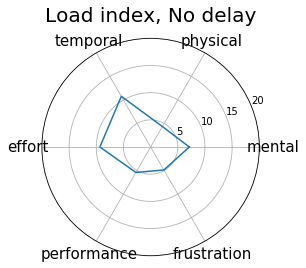

In [17]:
delay_guess = {}
load_description = ['mental', 'physical', 'temporal', 'effort', 'performance', 'frustration']
N = len(load_description)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for exp in range(3):
    load = pd.read_sql_query("select mental, physical, temporal, effort, performance, frustration from survey where valid=1 and experiment={};".format(exp), conn)
    load_ar = np.array(load)
    avg = np.average(load_ar, axis=0)
    values = avg.tolist()
    values[4]=10-values[4]
    values += values[:1]
    values = [val*2 for val in values]
    
    ax = plt.subplot(111, polar=True) 
    ax.set_title('Load index, {}'.format(exp_dict[exp]), size=20)
    plt.xticks(angles[:-1], load_description, size=15) 
#     ax.set_rlabel_position(0)
    plt.yticks([5, 10, 15, 20], ["5","10", '15', '20'])
    plt.ylim(0,20) 
    ax.plot(angles, values)
    plt.show()
    